<a href="https://colab.research.google.com/github/Akshaya345/AIML_Tutorial/blob/main/AIML_Module1_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
rng=np.random.default_rng(seed=42)
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp
import math

In [3]:
(train_X,train_y),(test_X,test_y)=mnist.load_data()
train_X=train_X/255
test_X=test_X/255
train_X=train_X[::1200,:,:].copy()
train_y=train_y[::1200].copy()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
def NN1(traindata,trainlabel,query):
  diff=traindata-query
  sq=diff*diff
  dist=sq.sum(1)
  label=trainlabel[np.argmin(dist)]
  return label

def NN(traindata,trainlabel,testdata):
  traindata=traindata.reshape(-1,28*28)
  testdata=testdata.reshape(-1,28*28)
  predlabel=np.array([NN1(traindata,trainlabel,i) for i in testdata])
  return predlabel

def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel),"Length of the groundtruth labels and predicted labels should be the same."
  correct=(gtlabel==predlabel).sum()
  return correct/len(gtlabel)

In [5]:
testpred=NN(train_X,train_y,test_X)
print('Baseline accuracy without augmentation is: ',Accuracy(test_y,testpred))

Baseline accuracy without augmentation is:  0.6472


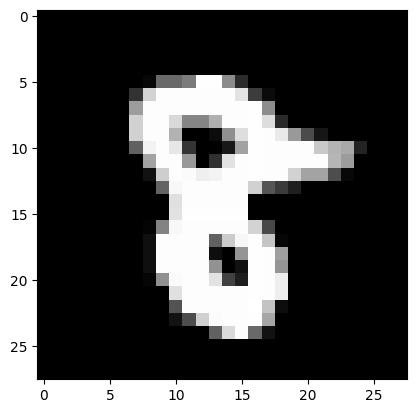

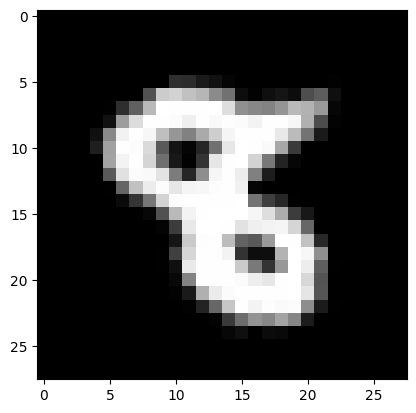

In [6]:
plt.imshow(train_X[2],cmap='gray')
plt.show()
plt.imshow(rotate(train_X[2],25),cmap='gray')
plt.show()

In [7]:
def augRotate(sample,angleconstraint):
  if angleconstraint==0:
    return sample
  if len(sample.shape)==2:
    sample=np.expand_dims(sample,0)
  angle=rng.random(len(sample))
  angle=(angle-0.5)*angleconstraint
  nsample=sample.copy()
  for i in range(len(sample)):
    nsample[i]=rotate(sample[i],angle[i])
  return np.squeeze(nsample)

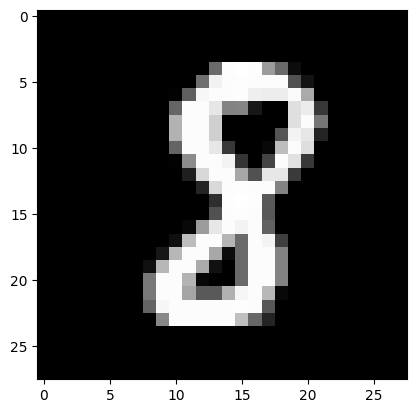

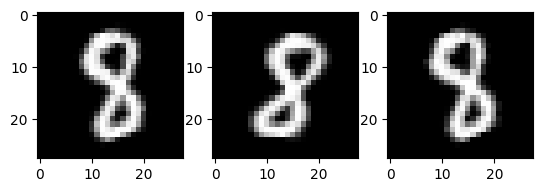

In [8]:
sample=train_X[20]
angleconstraint=70
plt.imshow(sample,cmap='gray')
plt.show()
plt.subplot(1,3,1)
plt.imshow(augRotate(sample,angleconstraint),cmap='gray')
plt.subplot(1,3,2)
plt.imshow(augRotate(sample,angleconstraint),cmap='gray')
plt.subplot(1,3,3)
plt.imshow(augRotate(sample,angleconstraint),cmap='gray')

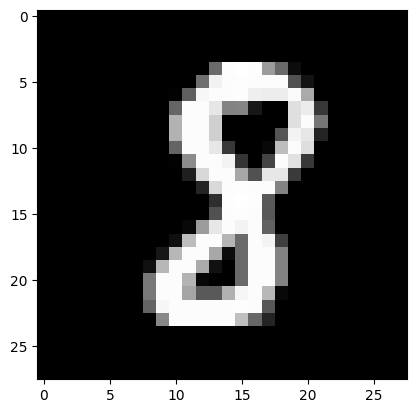

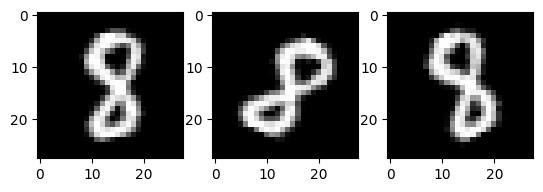

In [9]:
sample=train_X[20]
angleconstraint=60
plt.imshow(sample,cmap='gray')
plt.show()
plt.subplot(1,3,1)
plt.imshow(augRotate(sample,angleconstraint),cmap='gray')
plt.subplot(1,3,2)
plt.imshow(augRotate(sample,angleconstraint),cmap='gray')
plt.subplot(1,3,3)
plt.imshow(augRotate(sample,angleconstraint),cmap='gray')

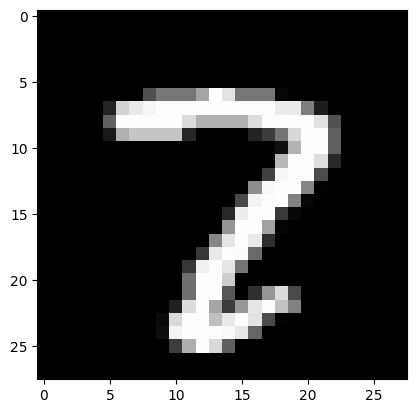

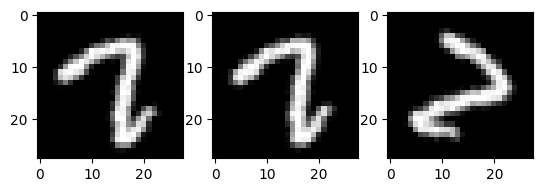

In [10]:
sample=train_X[10]
angleconstraint=100
plt.imshow(sample,cmap='gray')
plt.show()
plt.subplot(1,3,1)
plt.imshow(augRotate(sample,angleconstraint),cmap='gray')
plt.subplot(1,3,2)
plt.imshow(augRotate(sample,angleconstraint),cmap='gray')
plt.subplot(1,3,3)
plt.imshow(augRotate(sample,angleconstraint),cmap='gray')

In [11]:
angleconstraint=60
naugmentations=5
augdata=train_X
auglabel=train_y
for i in range(naugmentations):
  augdata=np.concatenate((augdata,augRotate(train_X,angleconstraint)))
  auglabel=np.concatenate((auglabel,train_y))

testpred=NN(augdata,auglabel,test_X)
print('Accuracy after rotation augmentation is: ',Accuracy(test_y,testpred))

Accuracy after rotation augmentation is:  0.6743


In [12]:
angleconstraints=[0,10,20,30,40,50,60,70,80,90]
accuracies=np.zeros(len(angleconstraints), dtype=np.float)
for i in range(len(angleconstraints)):
  augdata=train_X
  auglabel=train_y
  for j in range(naugmentations):
    augdata=np.concatenate((augdata,augRotate(train_X,angleconstraints[i])))
    auglabel=np.concatenate((auglabel,train_y))
  testpred=NN(augdata,auglabel,test_X)
  accuracies[i]=Accuracy(test_y,testpred)
  print('Accuracy after rotation augmentation constrained by ',angleconstraints[i],' is: ',accuracies[i],flush=True)

<ipython-input-12-8552911de90d>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies=np.zeros(len(angleconstraints), dtype=np.float)


Accuracy after rotation augmentation constrained by  0  is:  0.6472
Accuracy after rotation augmentation constrained by  10  is:  0.6648
Accuracy after rotation augmentation constrained by  20  is:  0.6686
Accuracy after rotation augmentation constrained by  30  is:  0.675
Accuracy after rotation augmentation constrained by  40  is:  0.6712
Accuracy after rotation augmentation constrained by  50  is:  0.6688
Accuracy after rotation augmentation constrained by  60  is:  0.6722
Accuracy after rotation augmentation constrained by  70  is:  0.6562
Accuracy after rotation augmentation constrained by  80  is:  0.6474
Accuracy after rotation augmentation constrained by  90  is:  0.6531


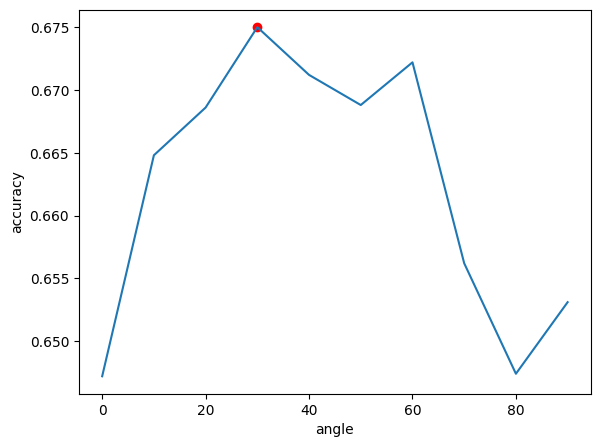

In [13]:
fig=plt.figure()
ax=fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(angleconstraints,accuracies)
ax.set_xlabel('angle')
ax.set_ylabel('accuracy')
maxind=np.argmax(accuracies)
plt.scatter(angleconstraints[maxind],accuracies[maxind],c='red')

In [14]:
def shear(sample,amount):
  tform=AffineTransform(shear=amount)
  img=warp(sample,tform)
  col=img.sum(0).nonzero()[0]
  row=img.sum(1).nonzero()[0]
  if len(col)>0 and len(row)>0:
    xshift=int(sample.shape[0]/2-(row[0]+row[-1])/2)
    yshift=int(sample.shape[1]/2-(col[0]+col[-1])/2)
    img=np.roll(img,(xshift,yshift),(0,1))
  return img

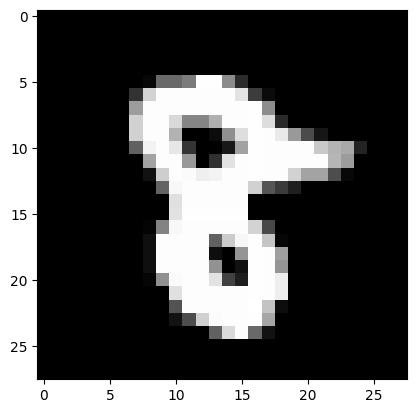

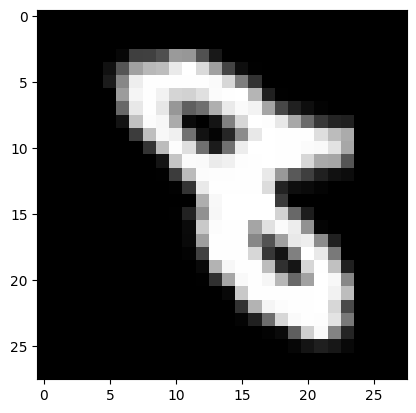

In [15]:
sample=train_X[2]
plt.imshow(sample,cmap='gray')
plt.show()

plt.imshow(shear(sample,0.4),cmap='gray')

In [16]:
def augShear(sample,shearconstraint):
  if shearconstraint==0:
    return sample
  if len(sample.shape)==2:
    sample=np.expand_dims(sample,0)
  amt=rng.random(len(sample))
  amt=(amt-0.5)*shearconstraint
  nsample=sample.copy()
  for i in range(len(sample)):
    nsample[i]=shear(sample[i],amt[i])
  return np.squeeze(nsample)

In [17]:
shearconstraints=[0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0]
accuracies=np.zeros(len(shearconstraints),dtype=np.float)
for i in range(len(shearconstraints)):
  augdata=train_X
  auglabel=train_y
  for j in range(naugmentations):
    augdata=np.concatenate((augdata,augShear(train_X, shearconstraints[i])))
    auglabel=np.concatenate((auglabel,train_y))
  testpred=NN(augdata,auglabel,test_X)
  accuracies[i]=Accuracy(test_y,testpred)
  print('Accuracy after shear augmentation constrained by: ',shearconstraints[i], ' is ',accuracies[i],flush=True)

<ipython-input-17-fd901516efa0>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies=np.zeros(len(shearconstraints),dtype=np.float)


Accuracy after shear augmentation constrained by:  0  is  0.6472
Accuracy after shear augmentation constrained by:  0.2  is  0.6181
Accuracy after shear augmentation constrained by:  0.4  is  0.628
Accuracy after shear augmentation constrained by:  0.6  is  0.6435
Accuracy after shear augmentation constrained by:  0.8  is  0.6511
Accuracy after shear augmentation constrained by:  1.0  is  0.6482
Accuracy after shear augmentation constrained by:  1.2  is  0.6388
Accuracy after shear augmentation constrained by:  1.4  is  0.6303
Accuracy after shear augmentation constrained by:  1.6  is  0.5962
Accuracy after shear augmentation constrained by:  1.8  is  0.6138
Accuracy after shear augmentation constrained by:  2.0  is  0.6252


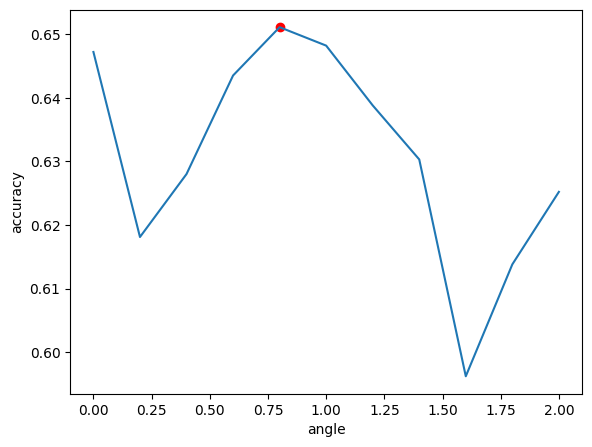

In [18]:
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(shearconstraints, accuracies)
ax.set_xlabel('angle')
ax.set_ylabel('accuracy')
maxind=np.argmax(accuracies)
plt.scatter(shearconstraints[maxind],accuracies[maxind],c='red')

In [19]:
def augRotateShear(sample,angleconstraint,shearconstraint):
  if len(sample.shape)==2:
    sample=np.expand_dims(sample,0)
  amt=rng.random(len(sample))
  amt=(amt-0.5)*shearconstraint
  angle=rng.random(len(sample))
  angle=(angle-0.5)*angleconstraint
  nsample=sample.copy()
  for i in range(len(sample)):
    nsample[i]=rotate(shear(sample[i],amt[i]),angle[i])
  return np.squeeze(nsample)

In [31]:
shearconstraints = [0, 0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6]
angleconstraints = [0,10,20,30,40,50,60]
hyp=cartesian((shearconstraints,angleconstraints))

accuracies=np.zeros(len(hyp),dtype=np.float)

for i in range(len(hyp)):
  augdata=train_X
  auglabel=train_y
  for j in range(naugmentations):
    augdata=np.concatenate((augdata,augRotateShear(train_X,hyp[i][0],hyp[i][1])))
    auglabel=np.concatenate((auglabel,train_y))
  testpred=NN(augdata,auglabel,test_X)
  accuracies[i]=Accuracy(test_y,testpred)
  print('Accuracy after augmentation shear:',hyp[i][0],'angle:',hyp[i][1],' is ',accuracies[i],flush=True)

<ipython-input-31-cd47d4be4033>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies=np.zeros(len(hyp),dtype=np.float)


Accuracy after augmentation shear: 0.0 angle: 0.0  is  0.6332
Accuracy after augmentation shear: 0.0 angle: 10.0  is  0.6197
Accuracy after augmentation shear: 0.0 angle: 20.0  is  0.5953
Accuracy after augmentation shear: 0.0 angle: 30.0  is  0.6002
Accuracy after augmentation shear: 0.0 angle: 40.0  is  0.5953
Accuracy after augmentation shear: 0.0 angle: 50.0  is  0.5942
Accuracy after augmentation shear: 0.0 angle: 60.0  is  0.5738
Accuracy after augmentation shear: 0.2 angle: 0.0  is  0.6334
Accuracy after augmentation shear: 0.2 angle: 10.0  is  0.5973
Accuracy after augmentation shear: 0.2 angle: 20.0  is  0.5937
Accuracy after augmentation shear: 0.2 angle: 30.0  is  0.6046
Accuracy after augmentation shear: 0.2 angle: 40.0  is  0.6055
Accuracy after augmentation shear: 0.2 angle: 50.0  is  0.6114
Accuracy after augmentation shear: 0.2 angle: 60.0  is  0.612
Accuracy after augmentation shear: 0.4 angle: 0.0  is  0.6341
Accuracy after augmentation shear: 0.4 angle: 10.0  is  0.6

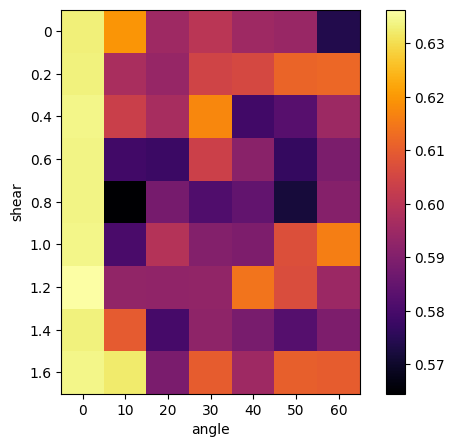

In [32]:
fig=plt.figure()
ax=fig.add_axes([0.1, 0.1, 0.8, 0.8])
im=ax.imshow(accuracies.reshape((len(shearconstraints), len(angleconstraints))), cmap='inferno')
ax.set_xlabel('angle')
ax.set_ylabel('shear')
ax.set_xticks(np.arange(len(angleconstraints)));
ax.set_xticklabels(angleconstraints);
ax.set_yticks(np.arange(len(shearconstraints)));
ax.set_yticklabels(shearconstraints);
plt.colorbar(im)

In [33]:
shearconstraints=[0.0,0.2]
angleconstraints=[0.9,0.92,0.94,1]
hyp=cartesian((shearconstraints,angleconstraints))

accuracies=np.zeros(len(hyp),dtype=np.float)

for i in range(len(hyp)):
  augdata=train_X
  auglabel=train_y
  for j in range(naugmentations):
    augdata=np.concatenate((augdata,augRotateShear(train_X,hyp[i][0],hyp[i][1])))
    auglabel=np.concatenate((auglabel,train_y))
  testpred=NN(augdata,auglabel,test_X)
  accuracies[i]=Accuracy(test_y,testpred)
  print('Accuracy after augmentation shear:',hyp[i][0],'angle:',hyp[i][1],' is ',accuracies[i],flush=True)

<ipython-input-33-2913dc14b31d>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies=np.zeros(len(hyp),dtype=np.float)


Accuracy after augmentation shear: 0.0 angle: 0.9  is  0.641
Accuracy after augmentation shear: 0.0 angle: 0.92  is  0.6577
Accuracy after augmentation shear: 0.0 angle: 0.94  is  0.6457
Accuracy after augmentation shear: 0.0 angle: 1.0  is  0.6454
Accuracy after augmentation shear: 0.2 angle: 0.9  is  0.6554
Accuracy after augmentation shear: 0.2 angle: 0.92  is  0.6366
Accuracy after augmentation shear: 0.2 angle: 0.94  is  0.6592
Accuracy after augmentation shear: 0.2 angle: 1.0  is  0.6413


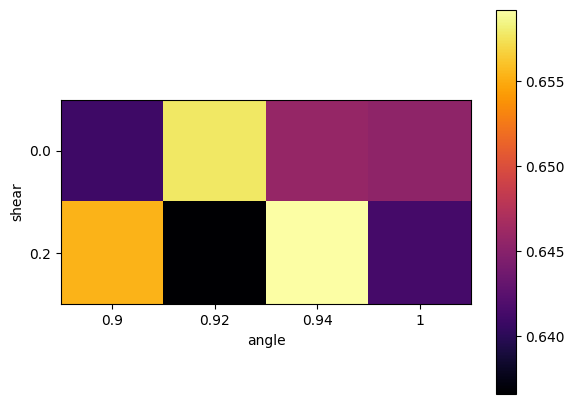

In [34]:
fig=plt.figure()
ax=fig.add_axes([0.1, 0.1, 0.8, 0.8])
im=ax.imshow(accuracies.reshape((len(shearconstraints), len(angleconstraints))), cmap='inferno')
ax.set_xlabel('angle')
ax.set_ylabel('shear')
ax.set_xticks(np.arange(len(angleconstraints)));
ax.set_xticklabels(angleconstraints);
ax.set_yticks(np.arange(len(shearconstraints)));
ax.set_yticklabels(shearconstraints);
plt.colorbar(im)

In [35]:
shearconstraints=[0,1]
angleconstraints=[0.94,0.95,0.96,0.97,0.98,0.99,1,1.01,1.02]
hyp=cartesian((shearconstraints,angleconstraints))

accuracies=np.zeros(len(hyp),dtype=np.float)

for i in range(len(hyp)):
  augdata=train_X
  auglabel=train_y
  for j in range(naugmentations):
    augdata=np.concatenate((augdata,augRotateShear(train_X,hyp[i][0],hyp[i][1])))
    auglabel=np.concatenate((auglabel,train_y))
  testpred=NN(augdata,auglabel,test_X)
  accuracies[i]=Accuracy(test_y,testpred)
  print('Accuracy after augmentation shear:',hyp[i][0],'angle:',hyp[i][1],' is ',accuracies[i],flush=True)

<ipython-input-35-fb296ea82d9a>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies=np.zeros(len(hyp),dtype=np.float)


Accuracy after augmentation shear: 0.0 angle: 0.94  is  0.6537
Accuracy after augmentation shear: 0.0 angle: 0.95  is  0.6529
Accuracy after augmentation shear: 0.0 angle: 0.96  is  0.6482
Accuracy after augmentation shear: 0.0 angle: 0.97  is  0.6543
Accuracy after augmentation shear: 0.0 angle: 0.98  is  0.6501
Accuracy after augmentation shear: 0.0 angle: 0.99  is  0.6554
Accuracy after augmentation shear: 0.0 angle: 1.0  is  0.6429
Accuracy after augmentation shear: 0.0 angle: 1.01  is  0.6476
Accuracy after augmentation shear: 0.0 angle: 1.02  is  0.6571
Accuracy after augmentation shear: 1.0 angle: 0.94  is  0.6415
Accuracy after augmentation shear: 1.0 angle: 0.95  is  0.653
Accuracy after augmentation shear: 1.0 angle: 0.96  is  0.6517
Accuracy after augmentation shear: 1.0 angle: 0.97  is  0.6536
Accuracy after augmentation shear: 1.0 angle: 0.98  is  0.641
Accuracy after augmentation shear: 1.0 angle: 0.99  is  0.644
Accuracy after augmentation shear: 1.0 angle: 1.0  is  0.65

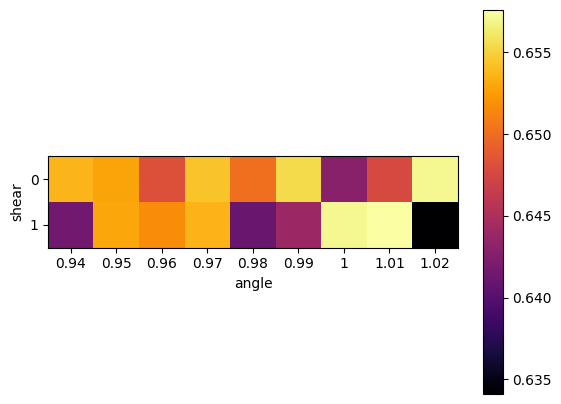

In [36]:
fig=plt.figure()
ax=fig.add_axes([0.1, 0.1, 0.8, 0.8])
im=ax.imshow(accuracies.reshape((len(shearconstraints), len(angleconstraints))), cmap='inferno')
ax.set_xlabel('angle')
ax.set_ylabel('shear')
ax.set_xticks(np.arange(len(angleconstraints)));
ax.set_xticklabels(angleconstraints);
ax.set_yticks(np.arange(len(shearconstraints)));
ax.set_yticklabels(shearconstraints);
plt.colorbar(im)

In [47]:
shearconstraints = [0.0,0.1,0.2]
angleconstraints = [0.98,0.982,0.984,0.986,0.988,0.99]
hyp=cartesian((shearconstraints,angleconstraints))

accuracies=np.zeros(len(hyp),dtype=np.float)

for i in range(len(hyp)):
  augdata=train_X
  auglabel=train_y
  for j in range(naugmentations):
    augdata=np.concatenate((augdata,augRotateShear(train_X,hyp[i][0],hyp[i][1])))
    auglabel=np.concatenate((auglabel,train_y))
  testpred=NN(augdata,auglabel,test_X)
  accuracies[i]=Accuracy(test_y,testpred)
  print('Accuracy after augmentation shear:',hyp[i][0],'angle:',hyp[i][1],' is ',accuracies[i],flush=True)

<ipython-input-47-ad23e2d7eef2>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies=np.zeros(len(hyp),dtype=np.float)


Accuracy after augmentation shear: 0.0 angle: 0.98  is  0.6664
Accuracy after augmentation shear: 0.0 angle: 0.982  is  0.6643
Accuracy after augmentation shear: 0.0 angle: 0.984  is  0.6628
Accuracy after augmentation shear: 0.0 angle: 0.986  is  0.6664
Accuracy after augmentation shear: 0.0 angle: 0.988  is  0.6678
Accuracy after augmentation shear: 0.0 angle: 0.99  is  0.6608
Accuracy after augmentation shear: 0.1 angle: 0.98  is  0.6658
Accuracy after augmentation shear: 0.1 angle: 0.982  is  0.6676
Accuracy after augmentation shear: 0.1 angle: 0.984  is  0.6652
Accuracy after augmentation shear: 0.1 angle: 0.986  is  0.6652
Accuracy after augmentation shear: 0.1 angle: 0.988  is  0.6666
Accuracy after augmentation shear: 0.1 angle: 0.99  is  0.6612
Accuracy after augmentation shear: 0.2 angle: 0.98  is  0.6631
Accuracy after augmentation shear: 0.2 angle: 0.982  is  0.6613
Accuracy after augmentation shear: 0.2 angle: 0.984  is  0.6677
Accuracy after augmentation shear: 0.2 angle:

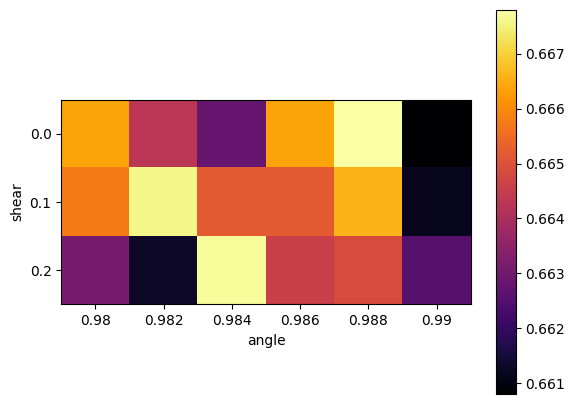

In [48]:
fig=plt.figure()
ax=fig.add_axes([0.1, 0.1, 0.8, 0.8])
im=ax.imshow(accuracies.reshape((len(shearconstraints), len(angleconstraints))), cmap='inferno')
ax.set_xlabel('angle')
ax.set_ylabel('shear')
ax.set_xticks(np.arange(len(angleconstraints)));
ax.set_xticklabels(angleconstraints);
ax.set_yticks(np.arange(len(shearconstraints)));
ax.set_yticklabels(shearconstraints);
plt.colorbar(im)

In [43]:
angleconstraint=60
naugmentations=50
augdata=train_X
auglabel=train_y
for i in range(naugmentations):
  augdata=np.concatenate((augdata,augRotate(train_X,angleconstraint)))
  auglabel=np.concatenate((auglabel,train_y))

testpred=NN(augdata,auglabel,test_X)
print('Accuracy after rotation augmentation is: ',Accuracy(test_y,testpred))

Accuracy after rotation augmentation is:  0.6782


In [44]:
angleconstraint=60
naugmentations=20
augdata=train_X
auglabel=train_y
for i in range(naugmentations):
  augdata=np.concatenate((augdata,augRotate(train_X,angleconstraint)))
  auglabel=np.concatenate((auglabel,train_y))

testpred=NN(augdata,auglabel,test_X)
print('Accuracy after rotation augmentation is: ',Accuracy(test_y,testpred))

Accuracy after rotation augmentation is:  0.6781


In [45]:
angleconstraint=60
naugmentations=30
augdata=train_X
auglabel=train_y
for i in range(naugmentations):
  augdata=np.concatenate((augdata,augRotate(train_X,angleconstraint)))
  auglabel=np.concatenate((auglabel,train_y))

testpred=NN(augdata,auglabel,test_X)
print('Accuracy after rotation augmentation is: ',Accuracy(test_y,testpred))

Accuracy after rotation augmentation is:  0.6801


In [46]:
angleconstraint=60
naugmentations=40
augdata=train_X
auglabel=train_y
for i in range(naugmentations):
  augdata=np.concatenate((augdata,augRotate(train_X,angleconstraint)))
  auglabel=np.concatenate((auglabel,train_y))

testpred=NN(augdata,auglabel,test_X)
print('Accuracy after rotation augmentation is: ',Accuracy(test_y,testpred))

Accuracy after rotation augmentation is:  0.6793


**1. What is the best value for angle constraint and shear constraint you got? How much did the accuracy improve as compared to not using augmentations?**

**Ans:**
The best value that I got is 0.6678 with shear constraint=0.0 and angle constraint=0.988. The accuracy improved upto 2% as compared to previous ones.


**2. Can you increase the accuracy by increasing the number of augmentations from each sample?**

**Ans:**
Yes, the accuracy can be increased by increasing the number of augmentations.
The highest accuracy that I got is 0.6801 when number of augmentations are 30.

**3. Try implementing a few augmentations of your own and experimenting with them. A good reference is <a href=https://www.analyticsvidhya.com/blog/2019/12/image-augmentation-deep-learning-pytorch/>here. </a>**

**Ans:**

**4. Try combining various augmentations. What is the highest accuracy you can get? What is the smallest training dataset you can take and still get accuracy above 50%?**

**Ans:**
The highest accuracy that I can get is 0.6678. The size of the dataset is 3 for shearconstraints and 5 for angleconstraints.
shearconstraints = [0.0,0.1,0.2]
angleconstraints = [0.98,0.982,0.984,0.986,0.988]